### Descriptive and Exploratory Data Analysis of 1980s Dataset

In [141]:
import numpy as np
import pandas as pd
import sklearn as sk
import scipy.stats as scp
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [67]:
# Import dataset
df_80s = pd.read_csv('../1980.csv')

In [68]:
total_rows, total_attributes = df_80s.shape

print('Total Rows:', total_rows)
print('Total Columns:', total_attributes)

Total Rows: 105
Total Columns: 15


The 70s song dataset contains 15 attributes with 104 data rows.

In [69]:
df_80s.head(5)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award
0,Livin' On A Prayer,Bon Jovi,glam metal,1986,123,89,53,-4,29,80,249,8,3,83,0.0
1,Africa,TOTO,album rock,1982,93,37,67,-18,5,73,296,26,3,83,1.0
2,Another One Bites The Dust - Remastered 2011,Queen,glam rock,1980,110,53,93,-6,16,75,215,11,16,82,1.0
3,Break My Stride,Matthew Wilder,new wave pop,1983,110,59,92,-11,9,83,184,20,6,81,1.0
4,I Wanna Dance with Somebody (Who Loves Me),Whitney Houston,dance pop,1987,119,82,71,-9,9,87,291,21,5,80,1.0


In [70]:
# Column overview
df_80s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          105 non-null    object 
 1   artist         105 non-null    object 
 2   genre          104 non-null    object 
 3   year           105 non-null    int64  
 4   bpm            105 non-null    int64  
 5   nrgy           105 non-null    int64  
 6   dnce           105 non-null    int64  
 7   dB             105 non-null    int64  
 8   live           105 non-null    int64  
 9   val            105 non-null    int64  
 10  dur            105 non-null    int64  
 11  acous          105 non-null    int64  
 12  spch           105 non-null    int64  
 13  popularity     105 non-null    int64  
 14  has_win_award  105 non-null    float64
dtypes: float64(1), int64(11), object(3)
memory usage: 12.4+ KB


The genre attribute contains 1 null value. This will further be addressed in the data processing stage. 

### Statistics

Genre Count

In [71]:
genre_arr = df_80s['genre']
genre_count = genre_arr.value_counts()
display(genre_count)

album rock             30
dance rock             14
adult standards        13
dance pop              11
glam rock               6
mellow gold             4
europop                 3
new wave pop            3
disco                   3
eurodance               2
glam metal              2
art rock                1
jazz fusion             1
alternative rock        1
classic danish pop      1
bronx hip hop           1
soft rock               1
glam punk               1
art pop                 1
bow pop                 1
hi-nrg                  1
classic rock            1
classic country pop     1
british soul            1
Name: genre, dtype: int64

From the value count, it is known that the majority of the most popular songs from the 80s is of album rock genre, followed by dance rock, and adult standards. A similar pattern where the songs is dominated by the album rock genre was also seen in the 1970s dataset. 

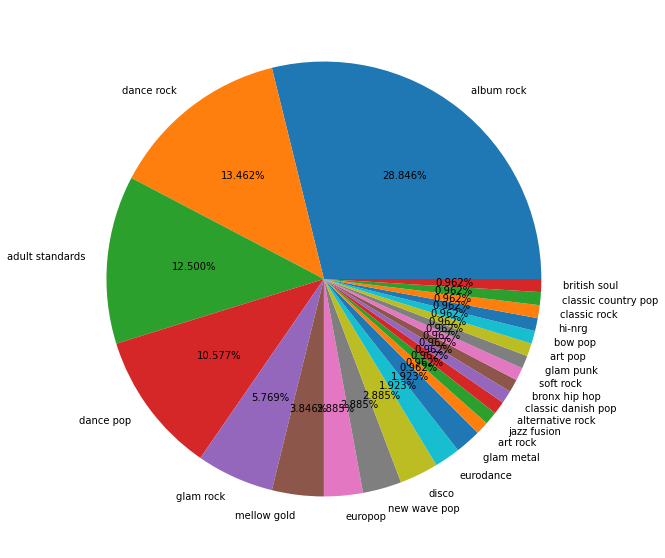

In [72]:
# Data visualization
plt.figure(figsize=(10,10))
plt.pie(genre_arr.value_counts(), labels=genre_count.index.tolist(), autopct='%1.3f%%')
plt.show()

### BPM

In [73]:
bpm_arr = df_80s['bpm']

In [74]:
# Compute additional information
Q1 = np.percentile(bpm_arr, 25, interpolation='midpoint')
Q3 = np.percentile(bpm_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

bpm_stats = [
    ['Mean', np.mean(bpm_arr)],
    ['Median', np.median(bpm_arr)],
    ['Mode', scp.mode(bpm_arr)[0][0]],
    ['Standard Deviation', np.std(bpm_arr)],
    ['Variance', np.var(bpm_arr)],
    ['Minimum', np.min(bpm_arr)],
    ['Maximum', np.max(bpm_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('BPM Description')
display(pd.DataFrame(bpm_stats, columns=['Measure', 'Value']))

BPM Description


,Measure,Value
0,Mean,122.609524
1,Median,122.000000
2,Mode,108.000000
3,Standard Deviation,24.938589
4,Variance,621.933243
5,Minimum,62.000000
6,Maximum,191.000000
7,Q1,108.000000
8,Q3,137.000000
9,IQR,29.000000


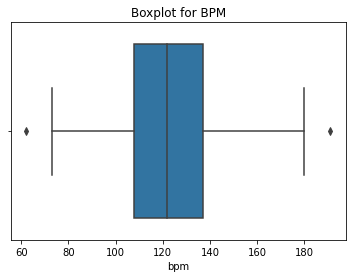

Outlier exists?  True


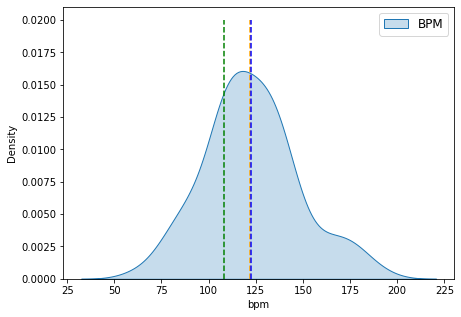

In [186]:
plt.title("Boxplot for BPM")
sns.boxplot(x='bpm', data=df_80s)
plt.show()

Q1 = np.percentile(bpm_arr, 25, interpolation='midpoint')
Q3 = np.percentile(bpm_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(bpm_arr) > RUB  or (np.min(bpm_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=bpm_arr, shade=True)
plt.legend(['BPM'], fontsize=12)
plt.vlines(x=bpm_arr.median(), ymin=0, ymax=0.02, color='orange', linestyle='--')
plt.vlines(x=bpm_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=scp.mode(bpm_arr)[0][0], ymin=0, ymax=0.02, color='green', linestyle='--')
plt.show()

In [188]:
# Skewness
bpm_arr.skew()

0.33886425305113316

As outlier exists and the data is numerical (not categorical), the median best describes the bpm column. However, the exact value of the mean and median is roughly equal, with a .6 difference. It is shown that the average and median bpm of the most popular songs in the 80s is 122. This is a 2 bpm increase than the observations found in the 1970s.

The positive skewness value implies that the mean is greater than the median, as evident in the graph. This is due to the existence of songs with bpm that exceeds the RUB such that it is shifted to the right. The overall distribution is fairly symmetrical.

#### NRGY

In [76]:
nrgy_arr = df_80s['nrgy']

In [77]:
# Compute additional information
Q1 = np.percentile(nrgy_arr, 25, interpolation='midpoint')
Q3 = np.percentile(nrgy_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

nrgy_stats = [
    ['Mean', np.mean(nrgy_arr)],
    ['Median', np.median(nrgy_arr)],
    ['Mode', scp.mode(nrgy_arr)[0][0]],
    ['Standard Deviation', np.std(nrgy_arr)],
    ['Variance', np.var(nrgy_arr)],
    ['Minimum', np.min(nrgy_arr)],
    ['Maximum', np.max(nrgy_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('NRGY Description')
display(pd.DataFrame(nrgy_stats, columns=['Measure', 'Value']))

NRGY Description


,Measure,Value
0,Mean,64.895238
1,Median,68.000000
2,Mode,59.000000
3,Standard Deviation,20.121499
4,Variance,404.874739
5,Minimum,24.000000
6,Maximum,98.000000
7,Q1,50.000000
8,Q3,83.000000
9,IQR,33.000000


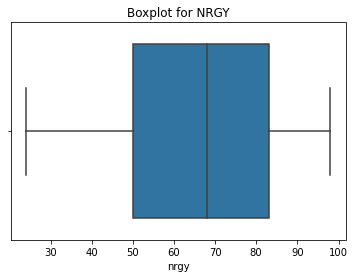

Outlier exists?  False
-0.30844235702385175


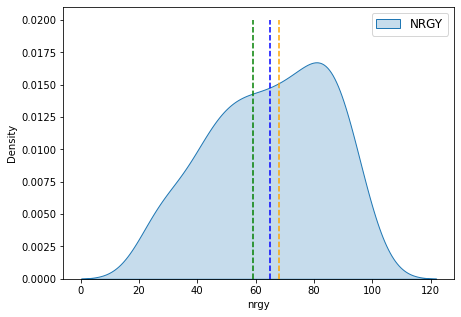

In [189]:
plt.title("Boxplot for NRGY")
sns.boxplot(x='nrgy', data=df_80s)
plt.show()

Q1 = np.percentile(nrgy_arr, 25, interpolation='midpoint')
Q3 = np.percentile(nrgy_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(nrgy_arr) > RUB  or (np.min(nrgy_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=nrgy_arr, shade=True)
plt.legend(['NRGY'], fontsize=12)
plt.vlines(x=nrgy_arr.median(), ymin=0, ymax=0.02, color='orange', linestyle='--')
plt.vlines(x=nrgy_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=scp.mode(nrgy_arr)[0][0], ymin=0, ymax=0.02, color='green', linestyle='--')
plt.show()

In [190]:
# Skeweness
nrgy_arr.skew()

-0.30844235702385175

From the KDE plot and the skewness calculation, it can be seen that the distribution is slightly negatively skewed. This is associated with the mean being less than the median. By the mean definition, we can infer that there are values that are much lower than the mean such that the mean is shifted to the left of the median. That is, there are songs with nrgy values that are much less than 64.895238. 

However, as the skewness value is relatively low, the distribution is fairly symmetrical.

#### DNCE

In [79]:
dnce_arr = df_80s['dnce']

In [80]:
# Compute additional information
Q1 = np.percentile(dnce_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dnce_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

dnce_stats = [
    ['Mean', np.mean(dnce_arr)],
    ['Median', np.median(dnce_arr)],
    ['Mode', scp.mode(dnce_arr)[0][0]],
    ['Standard Deviation', np.std(dnce_arr)],
    ['Variance', np.var(dnce_arr)],
    ['Minimum', np.min(dnce_arr)],
    ['Maximum', np.max(dnce_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('DNCE Description')
display(pd.DataFrame(dnce_stats, columns=['Measure', 'Value']))

DNCE Description


,Measure,Value
0,Mean,62.276190
1,Median,63.000000
2,Mode,63.000000
3,Standard Deviation,13.331306
4,Variance,177.723719
5,Minimum,27.000000
6,Maximum,93.000000
7,Q1,53.000000
8,Q3,71.000000
9,IQR,18.000000


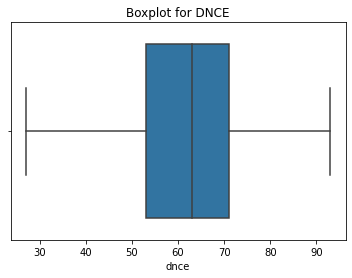

Outlier exists?  False


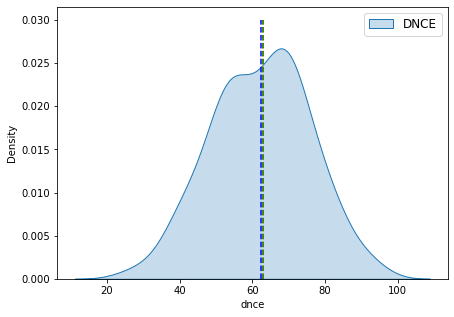

In [192]:
plt.title("Boxplot for DNCE")
sns.boxplot(x='dnce', data=df_80s)
plt.show()

Q1 = np.percentile(dnce_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dnce_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(dnce_arr) > RUB  or (np.min(dnce_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=dnce_arr, shade=True)
plt.legend(['DNCE'], fontsize=12)
plt.vlines(x=dnce_arr.median(), ymin=0, ymax=0.03, color='orange', linestyle='--')
plt.vlines(x=dnce_arr.mean(), ymin=0, ymax=0.03, color='blue', linestyle='--')
plt.vlines(x=scp.mode(dnce_arr)[0][0], ymin=0, ymax=0.03, color='green', linestyle='--')
plt.show()

We can measure the skewness as follows. 

In [82]:
dnce_arr.skew()

-0.10738335239013601

From the above KDE plot and the relatively small skewness value, the distribution is fairly symmetrical. The non existence of outliers also contributes to the the mean, median, and mode being roughly equal for the DNCE song data. 

#### dB

In [83]:
db_arr = df_80s['dB']

In [84]:
# Compute additional information
Q1 = np.percentile(db_arr, 25, interpolation='midpoint')
Q3 = np.percentile(db_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

db_stats = [
    ['Mean', np.mean(db_arr)],
    ['Median', np.median(db_arr)],
    ['Mode', scp.mode(db_arr)[0][0]],
    ['Standard Deviation', np.std(db_arr)],
    ['Variance', np.var(db_arr)],
    ['Minimum', np.min(db_arr)],
    ['Maximum', np.max(db_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('DB Description')
display(pd.DataFrame(db_stats, columns=['Measure', 'Value']))

DB Description


,Measure,Value
0,Mean,-9.095238
1,Median,-9.000000
2,Mode,-9.000000
3,Standard Deviation,3.694330
4,Variance,13.648073
5,Minimum,-18.000000
6,Maximum,-3.000000
7,Q1,-12.000000
8,Q3,-6.000000
9,IQR,6.000000


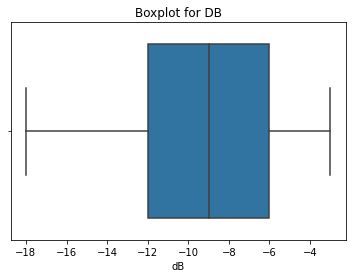

Outlier exists?  False


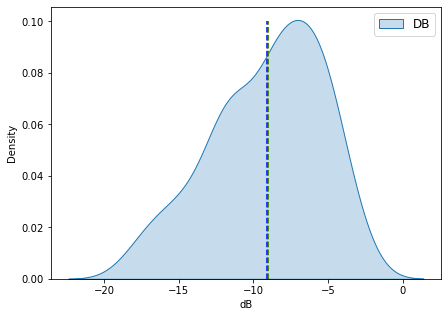

In [193]:
plt.title("Boxplot for DB")
sns.boxplot(x='dB', data=df_80s)
plt.show()

Q1 = np.percentile(db_arr, 25, interpolation='midpoint')
Q3 = np.percentile(db_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(db_arr) > RUB or (np.min(db_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=db_arr, shade=True)
plt.legend(['DB'], fontsize=12)
plt.vlines(x=db_arr.median(), ymin=0, ymax=0.1, color='orange', linestyle='--')
plt.vlines(x=db_arr.mean(), ymin=0, ymax=0.1, color='blue', linestyle='--')
plt.vlines(x=scp.mode(db_arr)[0][0], ymin=0, ymax=0.1, color='green', linestyle='--')
plt.show()

In [156]:
# Skewness of the KDE plot
db_arr.skew()

-0.5098421150912281

From the analysis above, it is shown that the data is negatvely skewed.  Nevertheless, from the descriptive statistics, it is shown that the mean, median, and mode are roughly equal.

#### LIVE

In [86]:
live_arr = df_80s['live']

In [87]:
# Compute additional information
Q1 = np.percentile(live_arr, 25, interpolation='midpoint')
Q3 = np.percentile(live_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

live_stats = [
    ['Mean', np.mean(live_arr)],
    ['Median', np.median(live_arr)],
    ['Mode', scp.mode(live_arr)[0][0]],
    ['Standard Deviation', np.std(live_arr)],
    ['Variance', np.var(live_arr)],
    ['Minimum', np.min(live_arr)],
    ['Maximum', np.max(live_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('LIVE Description')
display(pd.DataFrame(live_stats, columns=['Measure', 'Value']))

LIVE Description


,Measure,Value
0,Mean,16.419048
1,Median,11.000000
2,Mode,10.000000
3,Standard Deviation,13.792186
4,Variance,190.224399
5,Minimum,2.000000
6,Maximum,70.000000
7,Q1,8.000000
8,Q3,20.000000
9,IQR,12.000000


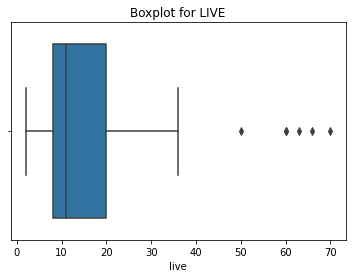

Outlier exists?  True


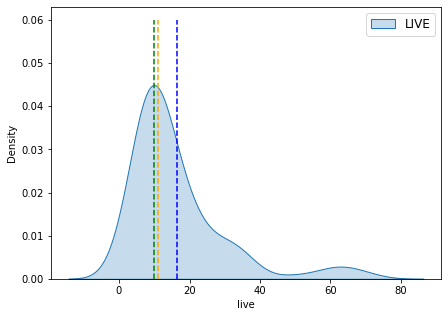

In [158]:
plt.title("Boxplot for LIVE")
sns.boxplot(x='live', data=df_80s)
plt.show()

Q1 = np.percentile(live_arr, 25, interpolation='midpoint')
Q3 = np.percentile(live_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(live_arr) > RUB or (np.min(live_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=live_arr, shade=True)
plt.legend(['LIVE'], fontsize=12)
plt.vlines(x=live_arr.median(), ymin=0, ymax=0.06, color='orange', linestyle='--')
plt.vlines(x=live_arr.mean(), ymin=0, ymax=0.06, color='blue', linestyle='--')
plt.vlines(x=scp.mode(live_arr)[0][0], ymin=0, ymax=0.06, color='green', linestyle='--')
plt.show()

As can be seen, outliers exist in this data. Therefore, the mean cannot be used to represent the data. As shown, mode < median < mean, indicating that the data is skewed to the left. The skewness exists because there are outliers (exceeding RUB) in the data such that the distribution has a longer tail on its right, while the distribution is highly concentrated on its left. Based on the data context, this happens as there are several songs that is very likely to be recorded live. Nevertheless, it can also be seen that more songs are not a live recording.

#### VAL

In [89]:
val_arr = df_80s['val']

In [90]:
# Compute additional information
Q1 = np.percentile(val_arr, 25, interpolation='midpoint')
Q3 = np.percentile(val_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

val_stats = [
    ['Mean', np.mean(val_arr)],
    ['Median', np.median(val_arr)],
    ['Mode', scp.mode(val_arr)[0][0]],
    ['Standard Deviation', np.std(val_arr)],
    ['Variance', np.var(val_arr)],
    ['Minimum', np.min(val_arr)],
    ['Maximum', np.max(val_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('VAL Description')
display(pd.DataFrame(val_stats, columns=['Measure', 'Value']))

VAL Description


,Measure,Value
0,Mean,63.123810
1,Median,70.000000
2,Mode,34.000000
3,Standard Deviation,25.816088
4,Variance,666.470385
5,Minimum,11.000000
6,Maximum,98.000000
7,Q1,40.000000
8,Q3,85.000000
9,IQR,45.000000


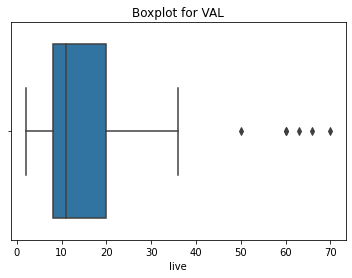

Outlier exists?  False


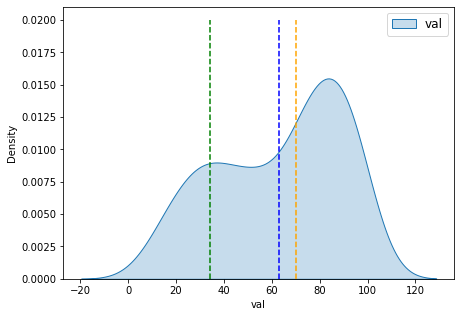

In [194]:
plt.title("Boxplot for VAL")
sns.boxplot(x='live', data=df_80s)
plt.show()

Q1 = np.percentile(val_arr, 25, interpolation='midpoint')
Q3 = np.percentile(val_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(val_arr) > RUB or (np.min(val_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=val_arr, shade=True)
plt.legend(['val'], fontsize=12)
plt.vlines(x=val_arr.median(), ymin=0, ymax=0.02, color='orange', linestyle='--')
plt.vlines(x=val_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=scp.mode(val_arr)[0][0], ymin=0, ymax=0.02, color='green', linestyle='--')
plt.show()

In [92]:
val_arr.skew()

-0.4172004536553062

The data is negatively skewed. In this case, mean < median. According to statisticshowto.com, in such dataset, the distribution contains a longer tail on the left. This is due to the fact that the data is more concentrated on the right, such that it can be inferred that the songs in the 80s tend to be have a higher positive mood. 

#### DUR

In [93]:
dur_arr = df_80s['dur']

In [94]:
# Compute additional information
Q1 = np.percentile(dur_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dur_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

dur_stats = [
    ['Mean', np.mean(dur_arr)],
    ['Median', np.median(dur_arr)],
    ['Mode', scp.mode(dur_arr)[0][0]],
    ['Standard Deviation', np.std(dur_arr)],
    ['Variance', np.var(dur_arr)],
    ['Minimum', np.min(dur_arr)],
    ['Maximum', np.max(dur_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('DUR Description')
display(pd.DataFrame(dur_stats, columns=['Measure', 'Value']))

DUR Description


,Measure,Value
0,Mean,258.942857
1,Median,251.000000
2,Mode,215.000000
3,Standard Deviation,50.988482
4,Variance,2599.825306
5,Minimum,162.000000
6,Maximum,433.000000
7,Q1,227.000000
8,Q3,285.000000
9,IQR,58.000000


Note: The variance is relatively large. This implies that the duration of the most popular songs in 1980s greatly vary from one another.

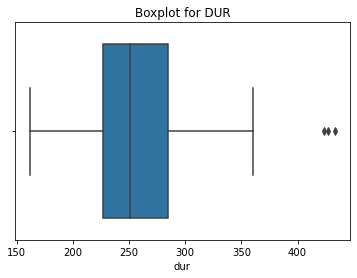

Outlier exists?  True


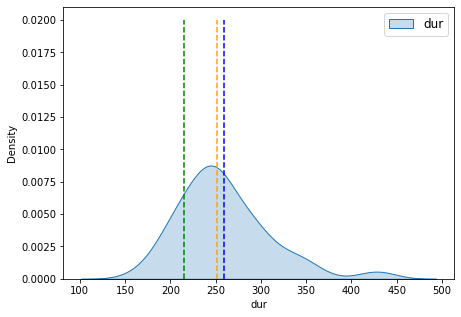

In [195]:
plt.title("Boxplot for DUR")
sns.boxplot(x='dur', data=df_80s)
plt.show()

Q1 = np.percentile(dur_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dur_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(dur_arr) > RUB or (np.min(dur_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=dur_arr, shade=True)
plt.legend(['dur'], fontsize=12)
plt.vlines(x=dur_arr.median(), ymin=0, ymax=0.02, color='orange', linestyle='--')
plt.vlines(x=dur_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=scp.mode(dur_arr)[0][0], ymin=0, ymax=0.02, color='green', linestyle='--')
plt.show()

In [167]:
# Skewness
dur_arr.skew()

1.1091545727951242

As shown from the KDE plot and the skewness calculation, the distribution is positively skewed. This is associated with the fact that the mean > median > mode. The mean is shifted to the right from the median due to the existence of outliers. 

#### ACOUS

In [96]:
acous_arr = df_80s['acous']

In [97]:
# Compute additional information
Q1 = np.percentile(acous_arr, 25, interpolation='midpoint')
Q3 = np.percentile(acous_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

acous_stats = [
    ['Mean', np.mean(acous_arr)],
    ['Median', np.median(acous_arr)],
    ['Mode', scp.mode(acous_arr)[0][0]],
    ['Standard Deviation', np.std(acous_arr)],
    ['Variance', np.var(acous_arr)],
    ['Minimum', np.min(acous_arr)],
    ['Maximum', np.max(acous_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('ACOUS Description')
display(pd.DataFrame(acous_stats, columns=['Measure', 'Value']))

ACOUS Description


,Measure,Value
0,Mean,24.571429
1,Median,19.000000
2,Mode,0.000000
3,Standard Deviation,21.575496
4,Variance,465.502041
5,Minimum,0.000000
6,Maximum,80.000000
7,Q1,7.000000
8,Q3,36.000000
9,IQR,29.000000


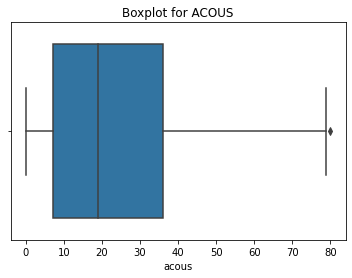

Outlier exists?  True


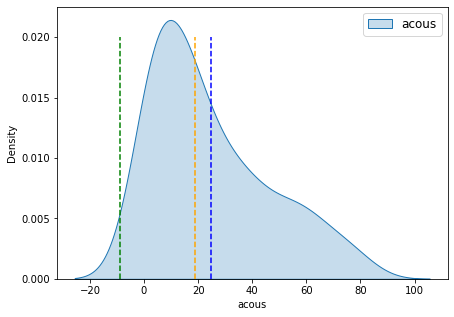

In [196]:
plt.title("Boxplot for ACOUS")
sns.boxplot(x='acous', data=df_80s)
plt.show()

Q1 = np.percentile(acous_arr, 25, interpolation='midpoint')
Q3 = np.percentile(acous_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(acous_arr) > RUB or (np.min(acous_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=acous_arr, shade=True)
plt.legend(['acous'], fontsize=12)
plt.vlines(x=acous_arr.median(), ymin=0, ymax=0.02, color='orange', linestyle='--')
plt.vlines(x=acous_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=scp.mode(db_arr)[0][0], ymin=0, ymax=0.02, color='green', linestyle='--')
plt.show()

In [170]:
# Skewness
acous_arr.skew()

0.8850572729949536

From the distribution, it can be seen that the a majority of the song tends to have a lower acous value. This is evident by the positive skewness value. The skewness is occurs due to a higher concentration of data in the left of the distribution and the existence of outliers that exceeds the reasonable upper bound. Such that, by refering to the acous-axis, they tend to have a lower acous value, hence tend to be non acoustic. (This is in accordance to the fact that a majority of them belongs to a rock genre).

It is also shown that the mean is greater than the median. This is associated with the existence of outliers such that the mean is shifted to the right.

#### SPCH

In [99]:
spch_arr = df_80s['spch']

In [100]:
# Compute additional information
Q1 = np.percentile(spch_arr, 25, interpolation='midpoint')
Q3 = np.percentile(spch_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

spch_stats = [
    ['Mean', np.mean(spch_arr)],
    ['Median', np.median(spch_arr)],
    ['Mode', scp.mode(spch_arr)[0][0]],
    ['Standard Deviation', np.std(spch_arr)],
    ['Variance', np.var(spch_arr)],
    ['Minimum', np.min(spch_arr)],
    ['Maximum', np.max(spch_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('SPCH Description')
display(pd.DataFrame(spch_stats, columns=['Measure', 'Value']))

SPCH Description


,Measure,Value
0,Mean,4.419048
1,Median,4.000000
2,Mode,3.000000
3,Standard Deviation,2.827689
4,Variance,7.995828
5,Minimum,2.000000
6,Maximum,19.000000
7,Q1,3.000000
8,Q3,4.000000
9,IQR,1.000000


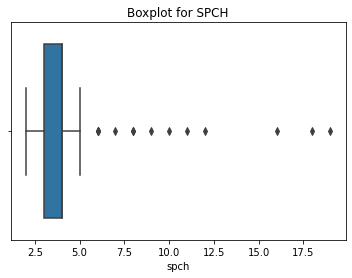

Outlier exists?  True


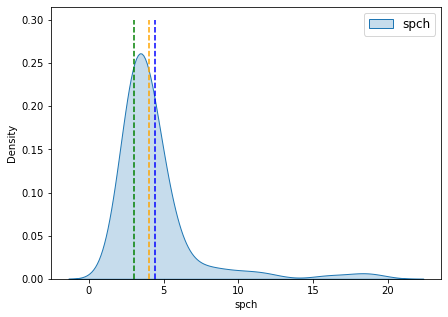

In [177]:
plt.title("Boxplot for SPCH")
sns.boxplot(x='spch', data=df_80s)
plt.show()

Q1 = np.percentile(spch_arr, 25, interpolation='midpoint')
Q3 = np.percentile(spch_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(spch_arr) > RUB)

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=spch_arr, shade=True)
plt.legend(['spch'], fontsize=12)
plt.vlines(x=spch_arr.mean(), ymin=0, ymax=0.3, color='blue', linestyle='--')
plt.vlines(x=spch_arr.median(), ymin=0, ymax=0.3, color='orange', linestyle='--')
plt.vlines(x=scp.mode(spch_arr)[0][0], ymin=0, ymax=0.3, color='green', linestyle='--')
plt.show()

In [178]:
# Skewness
spch_arr.skew()

3.4670629634915016

From the KDE plot, it can be seen that the data is positively skewed whered the mode is less than the median and the median is less than the mean. The right shift of the mean value is due to the existence of outliers that exceeds the RUB. In addition, the skewness also implies that the data is more concentrated on the left. Based on the number line, it can be seen that songs in the 80s has relatively lower spch values. That is, the songs tend to contain fewer spoken words. However, the data needs to be compared with the findings in the other decades for better understanding.

#### POPULARITY

In [102]:
popularity_arr = df_80s['popularity']

In [103]:
# Compute additional information
Q1 = np.percentile(popularity_arr, 25, interpolation='midpoint')
Q3 = np.percentile(popularity_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

popularity_stats = [
    ['Mean', np.mean(popularity_arr)],
    ['Median', np.median(popularity_arr)],
    ['Mode', scp.mode(popularity_arr)[0][0]],
    ['Standard Deviation', np.std(popularity_arr)],
    ['Variance', np.var(popularity_arr)],
    ['Minimum', np.min(popularity_arr)],
    ['Maximum', np.max(popularity_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('POPULARITY Description')
display(pd.DataFrame(popularity_stats, columns=['Measure', 'Value']))

POPULARITY Description


,Measure,Value
0,Mean,67.704762
1,Median,68.000000
2,Mode,70.000000
3,Standard Deviation,7.311991
4,Variance,53.465215
5,Minimum,43.000000
6,Maximum,83.000000
7,Q1,64.000000
8,Q3,72.000000
9,IQR,8.000000


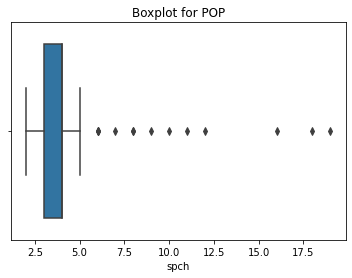

Outlier exists?  True


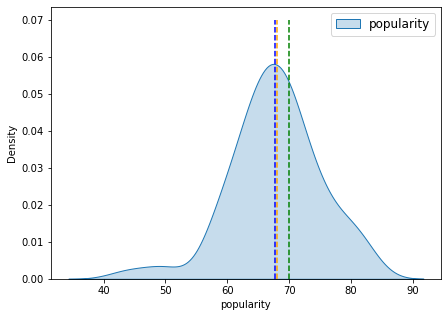

In [183]:
plt.title("Boxplot for POP")
sns.boxplot(x='spch', data=df_80s)
plt.show()

Q1 = np.percentile(popularity_arr, 25, interpolation='midpoint')
Q3 = np.percentile(popularity_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", (np.max(popularity_arr) > RUB) or (np.min(popularity_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=popularity_arr, shade=True)
plt.legend(['popularity'], fontsize=12)
scp.mode(popularity_arr)[0][0]
plt.vlines(x=popularity_arr.mean(), ymin=0, ymax=0.07, color='blue', linestyle='--')
plt.vlines(x=popularity_arr.median(), ymin=0, ymax=0.07, color='orange', linestyle='--')
plt.vlines(x=scp.mode(popularity_arr)[0][0], ymin=0, ymax=0.07, color='green', linestyle='--')
plt.show()

In [185]:
# Skewness
popularity_arr.skew()

-0.44755775552039007

From the skewness value and the visualization of the popularity distribution, the data is negatively skewed, where the mode > median > mean. The shift in the mean value to the left is due to the existence of outliers: the existence of songs with popularity value lower than the RLB.

#### Has Winning Award

In [105]:
win_arr = df_80s['has_win_award']

In [106]:
win_arr.value_counts()

0.0    98
1.0     7
Name: has_win_award, dtype: int64

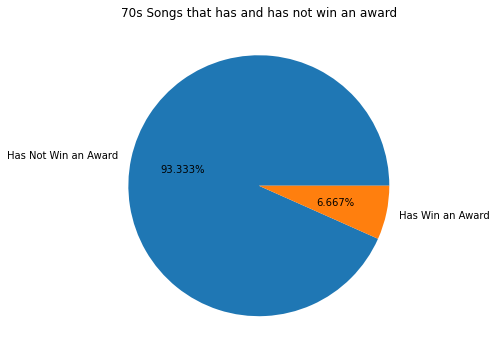

In [107]:
plt.figure(figsize=(6,6))
plt.title('70s Songs that has and has not win an award')
plt.pie(win_arr.value_counts(), labels=['Has Not Win an Award','Has Win an Award'], autopct='%1.3f%%')
plt.show()

 7 (6.667%) of the most popular songs from the 70s has win an award.

In [108]:
# Correlation map
df_80s.corr(method='pearson')

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award
year,1.000000,-0.014007,0.226273,0.143985,0.296413,-0.094952,0.141635,0.049201,-0.048284,0.013536,-0.244068,-0.145760
bpm,-0.014007,1.000000,0.093372,-0.175019,0.027610,-0.036683,0.079423,-0.229556,-0.074015,0.097939,-0.024553,-0.080019
nrgy,0.226273,0.093372,1.000000,0.107011,0.771913,0.235062,0.572673,-0.012705,-0.447982,0.335543,-0.093747,0.067803
dnce,0.143985,-0.175019,0.107011,1.000000,0.023546,-0.076616,0.515079,-0.023165,-0.097598,0.068680,-0.119337,0.163436
dB,0.296413,0.027610,0.771913,0.023546,1.000000,0.234426,0.292908,-0.030365,-0.353352,0.241769,-0.011265,-0.013780
live,-0.094952,-0.036683,0.235062,-0.076616,0.234426,1.000000,0.145817,-0.181547,-0.100180,0.101480,0.067427,-0.069022
val,0.141635,0.079423,0.572673,0.515079,0.292908,0.145817,1.000000,-0.073533,-0.275140,0.186896,-0.096625,0.130343
dur,0.049201,-0.229556,-0.012705,-0.023165,-0.030365,-0.181547,-0.073533,1.000000,0.088922,-0.032994,-0.168743,-0.102286
acous,-0.048284,-0.074015,-0.447982,-0.097598,-0.353352,-0.100180,-0.275140,0.088922,1.000000,0.039785,-0.129630,-0.088480
spch,0.013536,0.097939,0.335543,0.068680,0.241769,0.101480,0.186896,-0.032994,0.039785,1.000000,0.069089,0.176429


Text(0.5, 1.0, 'Correlation matrix')

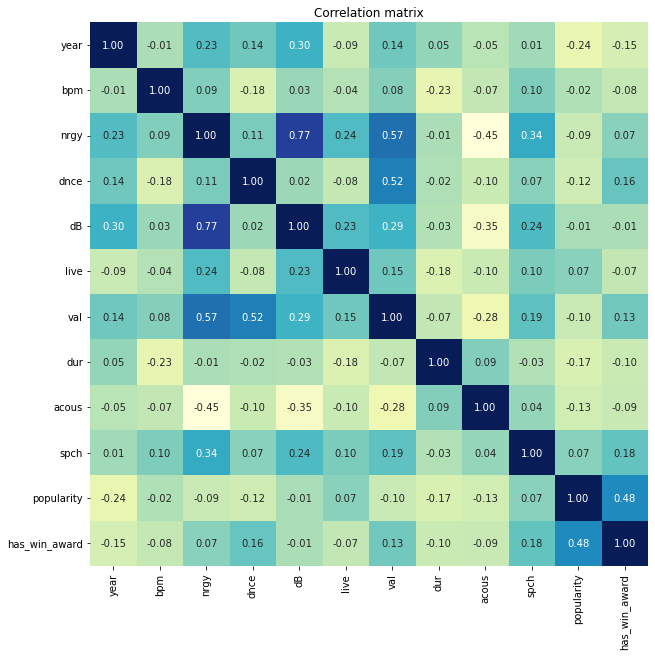

In [109]:
# Visualization heatmap correlation matrix
plt.figure(figsize=(10,10))

sns.heatmap(df_80s.select_dtypes(np.number).corr(), 
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=df_80s.select_dtypes(np.number).columns,
        yticklabels=df_80s.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

### Insights

<AxesSubplot:xlabel='dB', ylabel='nrgy'>

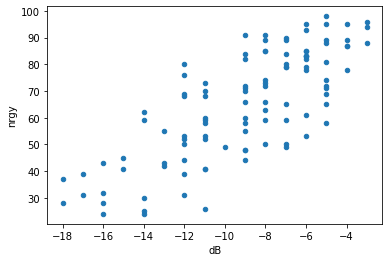

In [110]:
# dB and nrgy correlation
df_80s.plot.scatter(x='dB', y='nrgy', figsize=(6,4))

The correlation between dB and nrgy is 0.77. By the rule of thumb, this correlation can be considered to be relatively high. That is, if the dB value of the song is higher than average, it is likely that the nrgy value of the song is also above average, and vice versa. Hence, it can be implied that if the song is louder, the song tends to be more energetic. Nevertheless, this relation is not causation.

<AxesSubplot:xlabel='nrgy', ylabel='val'>

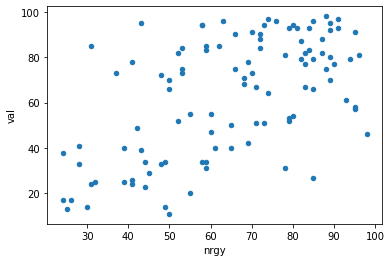

In [115]:
# dnce and val correlation
df_80s.plot.scatter(x='nrgy', y='val', figsize=(6,4))

There is a moderate positive correlation between nrgy and val. There is a weak trend: the more positive the mood of the song, the song also tends to be more energetic.

<AxesSubplot:xlabel='dnce', ylabel='val'>

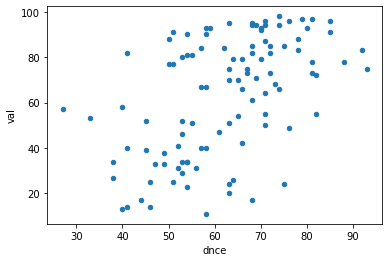

In [116]:
# dnce and val correlation
df_80s.plot.scatter(x='dnce', y='val', figsize=(6,4))

There is a weak positive correlation between val and dnce attribute. If the val attribute of the song is higher than the average, then the dnce attribute of the song is also likely to be above average. By the context of the data, it can be inferred that there is a weak positive correlation between the mood of the song and the easier it is to dance to the song. 

If the mood of the song is more positive, it is likely that it is also easier to dance to the song and vice versa.

From the correlation matrix, it is also shown that there is a negative moderate correlation between nrgy and accoustic. That is, the more accoustic the song is, it is likely that the energy (energeticness) of the song will be low. Nonetheless, the correlation is relatively weak.

The scatterplot is given below. 

<AxesSubplot:xlabel='acous', ylabel='nrgy'>

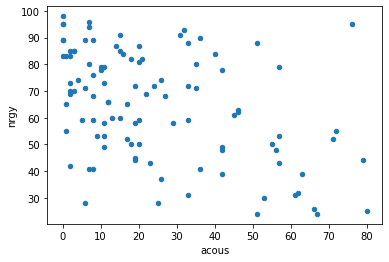

In [127]:
# dnce and val correlation
df_80s.plot.scatter(x='acous', y='nrgy', figsize=(6,4))

#### Artists

In [112]:
artist_arr = df_80s['artist']

In [113]:
artist_arr.value_counts()

Madonna                   4
Queen                     3
Whitney Houston           3
Elton John                3
Bon Jovi                  2
                         ..
John Parr                 1
Dexys Midnight Runners    1
Kate Bush                 1
Traveling Wilburys        1
Donna Summer              1
Name: artist, Length: 79, dtype: int64

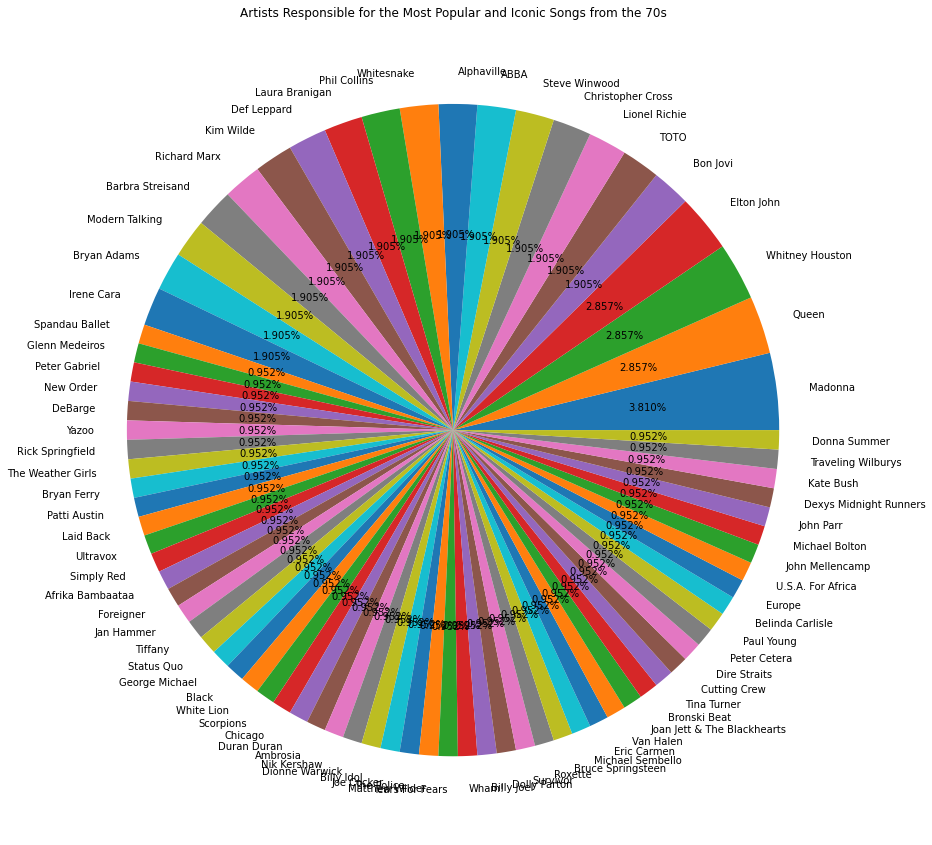

In [114]:
# Artists Responsible for the Most Popular and Iconic Songs from the 70s
plt.figure(figsize=(15,15))
plt.title('Artists Responsible for the Most Popular and Iconic Songs from the 70s')

plt.pie(artist_arr.value_counts(), labels=artist_arr.value_counts().index.tolist(), autopct='%1.3f%%')
plt.show()

The artists that are responsible for the most popular and iconic songs of the 1980s is more distributed, i.e. it is not dominated by 1 or more artists. It is also shown that Madonna is the artists that contributed the most to the most popular songs of 198s.